# 数据收集

本脚本展示如何获取本书其余部分需要的数据集。

老规矩，加载必要的Python库。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Iris数据集（R.Fisher/Scikit-Learn）

著名的花数据集。深度学习经典书籍《Deep Learning》用的最多数据集，所以也将这本书叫做花书。

最常用的机器学习数据集之一就是iris花数据集。我们使用一个简单的加载工具（来自scikit-learn的`dataset`）。可以从下面的链接获得更多知识。

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
# iris数据集是sklearn包自带的数据集。
#　这种写死在sklean中的包，应该符合两个条件：１）占用存储空间很小；２）经常使用。
from sklearn.datasets import load_iris

iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[5.1 3.5 1.4 0.2]
{0, 1, 2}


## 低生育率数据集（在Github上有，下载下来的源码包中也是有的，哈哈！！！）

低生育率数据集是一个来自于Hosmer和Lemeshow的著名研究的数据集。这个1989年的研究称为“低新生儿出生率风险参数研究”。该数据集是常用于逻辑回归方面的学术研究的数据集。我们在公共的github可以找到下载链接。下面是链接地址。

https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat

In [3]:
import requests

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
print(len(birth_data))
print(len(birth_data[0]))

189
9


## 房屋价格数据集(UCI)--要数据集，上kaggle！给kaggle打一波广告

还有常用的房屋价格数据集，该数据集来自于加州大学Irvine分校（UCI）机器学习Repository。该数据集是非常好的回归数据集。可以读下面的链接：

https://archive.ics.uci.edu/ml/datasets/Housing

In [4]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]
print(len(housing_data))
print(len(housing_data[0]))

506
14


## MNIST手写体数据集 (Yann LeCun) -- 人工智能大牛

MNIST手写体数据集是图像识别的`Hello World`。AI大师，Yann LeCun，在他的主页中给出了下载链接http://yann.lecun.com/exdb/mnist/。 但是因为MNIST数据集经常被使用，所以在TensorFlow中内建了MNIST的库。我们使用TensorFlow来获取这些数据。（但是最好还是提前下载，在网络不稳定的情况，你以为能够很容易的得到，你以为是iris数据集一样吗？不是的，少年。这个MNIST很大，很难直接内置了）

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[1,:])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

## CIFAR-10数据集

CIFAR-10数据集（https://www.cs.toronto.edu/~kriz/cifar.html） 是Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton创建的。其包含60000个32x32的图像数据，共有10个类别。这也是常用的数据集，因此TensorFlow内建了该数据集相关的加载代码（当然封装了TensorFlow的Keras也可以直接加载CIFAR-10数据集）。这里需要注意的是keras会自动将数据集分割为训练集（50000个）和测试集（10000个）。

In [6]:
from PIL import Image
# 运行命令需要稳定的互联网连接，并且需要时间来下载所有的图片。
(X_train, y_train), (X_test, y_test) = tf.contrib.keras.datasets.cifar10.load_data()

   499712/170498071 [..............................] - ETA: 3:23:00

KeyboardInterrupt: 

In [7]:
# 我们这里使用手动操作，来处理CIFAR-10数据集
# 可以看下21个实战项目

在CIFAR-10中的10个类别（按顺序）：

<ol start="0">
  <li>Airplane</li>
  <li>Automobile</li>
  <li>Bird</li>
  <li>Car</li>
  <li>Deer</li>
  <li>Dog</li>
  <li>Frog</li>
  <li>Horse</li>
  <li>Ship</li>
  <li>Truck</li>
</ol>

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [18]:
y_train[0,] # this is a frog

array([6], dtype=uint8)

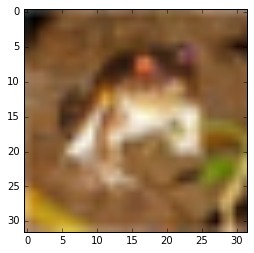

In [19]:
# Plot the 0-th image (a frog)
%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)

## Ham/Spam文本数据集(UCI)

我们使用另外一个UCI机器学习Repository数据集，称为SMS的Spam收集器。你可以阅读：https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection 。正如旁注所示，当预测一个数据点如果表示'spam'（或者不需要的广告），这个选择称为‘ham’（或者说是有用的信息）。

这是一个大数据集，用于预测一个二值输出（spam/ham）来预测文本。在自然语言处理（第7章）和循环神经网络（第9章）中的短文本序列中是非常有用的。

In [9]:
import requests
import io
from zipfile import ZipFile

# Get/read zip file
# zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
zip_url = './datasets/smsspamcollection.zip'
# r = requests.get(zip_url)
# z = ZipFile(io.BytesIO(r.content))
z = ZipFile(zip_url)
file = z.read('SMSSpamCollection')
# Format Data
text_data = file.decode()
text_data = text_data.encode('ascii',errors='ignore')
text_data = text_data.decode().split('\n')
text_data = [x.split('\t') for x in text_data if len(x)>=1]
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

5574
{'ham', 'spam'}
Ok lar... Joking wif u oni...


## 电影评论数据 (Cornell)

Bo Pang和Lillian Lee（Cornell的学者）收集了电影评论数据库。使用该数据集，来从文本输入中预测一个数值。

可以从以下链接中获取更多信息：
https://www.cs.cornell.edu/people/pabo/movie-review-data/

In [13]:
import requests
import io
import tarfile

# movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
movie_data_url = './datasets/rt-polaritydata.tar.gz'
# r = requests.get(movie_data_url)
# Stream data into temp object
# stream_data = io.BytesIO(r.content)
# tmp = io.BytesIO()
# while True:
#     s = stream_data.read(16384)
#     if not s:  
#         break
#     tmp.write(s)
# stream_data.close()
# tmp.seek(0)
# Extract tar file
# tar_file = tarfile.open(fileobj=tmp, mode="r:gz")

tar_file = tarfile.open(movie_data_url, mode="r:gz")
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
# 保存 pos/neg评论
pos_data = []
for line in pos:
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(neg_data[0])

5331
5331
simplistic , silly and tedious . 



## William shakespeare的完整工作 (Gutenberg Project)

为了训练一个TensorFlow模型来产生文本，我们在William shakepeare的完整工作中来训练它。这可以通过Gutenberg项目的优秀工作来获取。Gutenberg的项目免费退出了许多书。因为这些书也是来自于很多志愿者的辛勤工作。

可以从一下链接得到：

http://www.gutenberg.org/ebooks/100

In [31]:
# Shakespeare数据工作
import requests
import chardet

# shakespeare_url = 'http://www.gutenberg.org/cache/epub/100/pg100.txt'

shakespeare_url = './datasets/pg100.txt'
# Get Shakespeare text
# response = requests.get(shakespeare_url)
# shakespeare_file = response.content
# 解码二进制数据为字符格式
with open(shakespeare_url, 'rb') as shakespeare_file:
    print(chardet.detect(shakespeare_file.read()))
# shakespeare_text = shakespeare_file.read().decode('utf-8')
#     shakespeare_text = shakespeare_file.read()
#     print(shakespeare_text)
# # 取消前面描述少的段落。
# shakespeare_text = shakespeare_text[7675:]
# print(len(shakespeare_text))

{'encoding': None, 'confidence': 0.0, 'language': None}


## 英语-德语翻译数据库（Manythings/Tatoeba）

Tatoeba项目是志愿者驱动的，并且被设置为可以在多种不同的语言之间进行两两相互翻译。`Manythings.org` 编译了这些数据，并使得这些数据可以被下载。

http://www.manythings.org/corpus/about.html#info

更多数据可以从下面获取: http://www.manythings.org/bilingual/

In [32]:
# 英语-德语翻译数据集
import requests
import io
from zipfile import ZipFile
# sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
sentence_url = './datasets/deu-eng.zip'
# r = requests.get(sentence_url)
# z = ZipFile(io.BytesIO(r.content))
z = ZipFile(sentence_url)
file = z.read('deu.txt')
# Format Data
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[10])

176692
176692
['Go on.', 'Mach weiter.']
